# Neural Network for Sentiment Analysis

## Experimenting with Unigrams BoW

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import dill as pickle
from nn import neuralNetwork
from train_test import train_nn, evaluate_nn

### Loading data

In [3]:
training_file = "./sephora-data/sa-reviews_training.csv"
dev_file = "./sephora-data/sa-reviews_dev.csv"
test_file = "./sephora-data/sa-reviews_test.csv"

In [4]:
df_training = pd.read_csv(training_file)
df_dev = pd.read_csv(dev_file)
df_test = pd.read_csv(test_file)

In [5]:
#there is a review in Russian that after many trials, is still being saved in the final file
df_training.dropna(inplace=True) 
df_training = df_training.reset_index(drop = True)

### Extracting Data as BoW, unigrams

In [6]:
##unigrams

vectorizer = CountVectorizer(min_df=10)
# Fit and transform the text data
feat_vectorized_train = vectorizer.fit_transform(df_training['preprocessed_text'])
gold_labels_train = df_training['label'].to_numpy()
feat_vectorized_dev = vectorizer.transform(df_dev['preprocessed_text'])
gold_labels_dev = df_dev['label'].to_numpy()
feat_vectorized_test = vectorizer.transform(df_test['preprocessed_text'])
gold_labels_test = df_test['label'].to_numpy()

In [7]:
feat_vectorized_train.shape

(33934, 3494)

### Reducing dimensionality of the feature vector 

In [8]:
###as suggested by Christina Karavida and seen at https://dataaspirant.com/truncated-svd/

desired_dimension = 300
svd = TruncatedSVD(n_components=desired_dimension)
feat_vectorized_train_svd = svd.fit_transform(feat_vectorized_train)
feat_vectorized_dev_svd = svd.transform(feat_vectorized_dev)
feat_vectorized_test_svd = svd.transform(feat_vectorized_test)

In [9]:
feat_vectorized_train_svd.shape

(33934, 300)

### Defining the Neural Network parameters

In [10]:
# number of input, hidden and output nodes
input_nodes = desired_dimension #this is the size of the features - the length of the BoW
hidden_nodes = 100
output_nodes = 1

# learning rate
learning_rate = 0.01

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

### Training the Neural Network

Epoch 1/10, Elapsed Time: 0:00:03, Accuracy: 0.7632463016443685
Epoch 2/10, Elapsed Time: 0:00:03, Accuracy: 0.7855543113101904
Epoch 3/10, Elapsed Time: 0:00:04, Accuracy: 0.7979902163022338
Epoch 4/10, Elapsed Time: 0:00:02, Accuracy: 0.8065067483939412
Epoch 5/10, Elapsed Time: 0:00:02, Accuracy: 0.8114575352154182
Epoch 6/10, Elapsed Time: 0:00:02, Accuracy: 0.8166146048211234
Epoch 7/10, Elapsed Time: 0:00:04, Accuracy: 0.821418046796723
Epoch 8/10, Elapsed Time: 0:00:03, Accuracy: 0.824630164436848
Epoch 9/10, Elapsed Time: 0:00:02, Accuracy: 0.8272823716626393
Epoch 10/10, Elapsed Time: 0:00:02, Accuracy: 0.8293157305357458


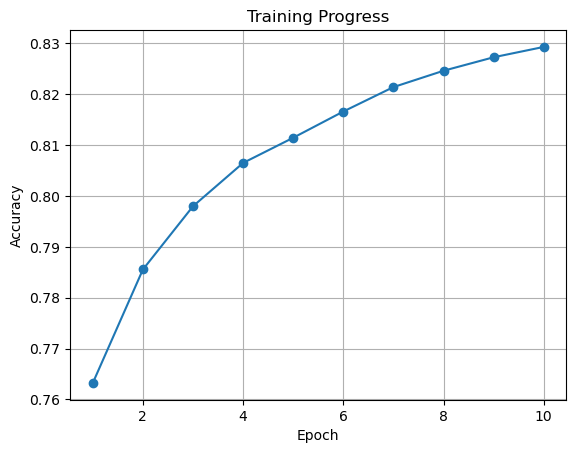

In [11]:
epochs = 10
nn_unigram_bow = train_nn(n, feat_vectorized_train_svd, gold_labels_train, epochs)

In [12]:
# saving the trained neural network to a file
pkl_filename = './models/nn_unigram_bow_model.pkl'
with open(pkl_filename, 'wb') as file:
     pickle.dump(nn_unigram_bow, file)

#saving the vectorizer for reproducibility
vec_filename = 'models/nn_unigram_bow_vectorizer.pkl'
with open(vec_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

### Evaluating the perfomance on validation set

In [13]:
# load from file
pkl_filename = './models/nn_unigram_bow_model.pkl'
with open(pkl_filename, 'rb') as file:
    nn_unigram_bow_model = pickle.load(file)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2986
           1       0.80      0.86      0.83      3003

    accuracy                           0.82      5989
   macro avg       0.82      0.82      0.82      5989
weighted avg       0.82      0.82      0.82      5989

[[2335  651]
 [ 413 2590]]


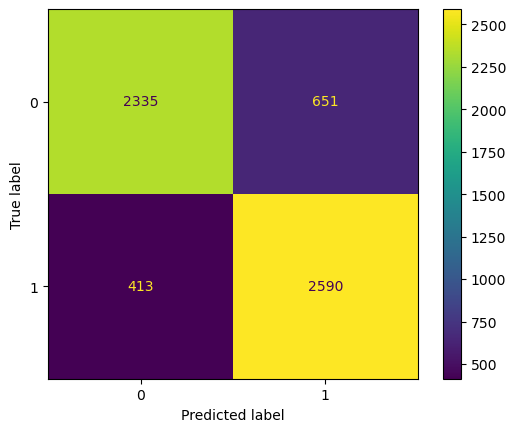

In [14]:
evaluate_nn(nn_unigram_bow_model, feat_vectorized_dev_svd, gold_labels_dev)

### Evaluation on test dataset

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4993
           1       0.81      0.85      0.83      4988

    accuracy                           0.83      9981
   macro avg       0.83      0.83      0.83      9981
weighted avg       0.83      0.83      0.83      9981

[[4002  991]
 [ 735 4253]]


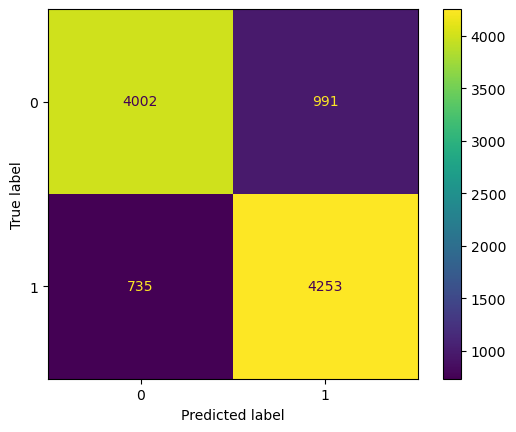

In [15]:
##
evaluate_nn(nn_unigram_bow_model, feat_vectorized_test_svd, gold_labels_test)